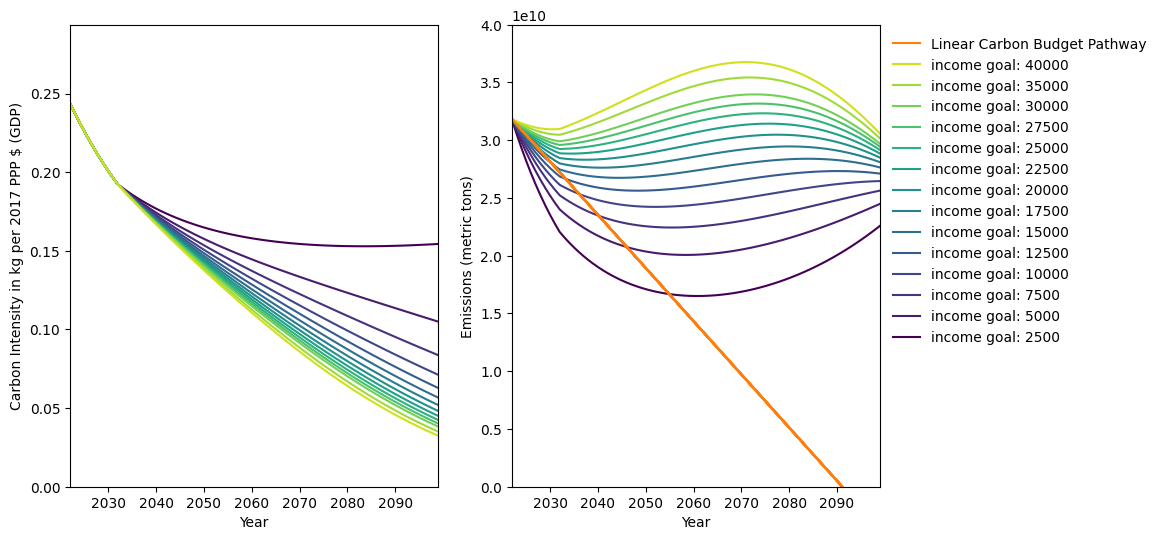

In [3]:
from scenario_class import Scenario
from plots_class import Plots
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
from scenariosweeper_class import ScenarioSweeper

# in this script we just sweep over the income_goal and end_year parameters to see how the total emissions pathway changes

# create a list of income goals
income_goals = [2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000, 27500, 30000, 35000, 40000]


# create colormap and map to income goals
colors = cm.viridis([i/len(income_goals) for i in range(len(income_goals))])    

# prepare figure to plot the results with two subplots in plot a is the current plot but in plot b we will plot the results of carbon intensity per scenario pathway
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot global emissions pathways
for income_goal in income_goals:
    scenario_params = {
        "end_year": 2100,
        "income_goal": income_goal,
        "carbon_budget": 1100,
        "gdp_assumption": "constant_ratio",
        "pop_growth_assumption": "semi_log_model",
        "tech_evolution_assumption": "plausible",
        "tech_hysteresis_assumption": "off" # turn off tech hysteresis for this plot
    }

    scenario_1 = Scenario(scenario_params)
    scenario_1.compute_country_scenario_params()
    scenario_1.run()

    plotting_1 = Plots(scenario_1)
    
    # Plot the results
    plotting_1.plot_global_emissions(ax=ax2,
                                    color=colors[income_goals.index(income_goal)],
                                    label="income goal: " + str(income_goal))
    
    # Plot the results
    plotting_1.plot_global_carbon_intensity(ax=ax1,
                                            color=colors[income_goals.index(income_goal)],
                                            label="income goal: " + str(income_goal))


# Collect all legend handles and labels for global emissions pathways
handles1, labels1 = ax2.get_legend_handles_labels()

# Find unique labels and their handles, maintaining original order
unique_labels_handles1 = dict()
for label, handle in zip(labels1, handles1):
    if label not in unique_labels_handles1:
        unique_labels_handles1[label] = handle

# Prepare lists for sorted labels and their corresponding handles
sorted_labels1 = []
sorted_handles1 = []

# Add the "Linear Carbon Budget Pathway" first if it exists
if "Linear Carbon Budget Pathway" in unique_labels_handles1:
    sorted_labels1.append("Linear Carbon Budget Pathway")
    sorted_handles1.append(unique_labels_handles1["Linear Carbon Budget Pathway"])

# Process and sort income goal labels in descending order
income_goals_labels1 = [(label, handle) for label, handle in unique_labels_handles1.items() if label.startswith("income goal")]
# Sort based on the integer value extracted from the label
income_goals_labels1.sort(key=lambda x: int(x[0].split(": ")[1]), reverse=True)

# Append sorted income goal labels and their handles
sorted_labels1 += [label for label, _ in income_goals_labels1]
sorted_handles1 += [handle for _, handle in income_goals_labels1]

# Create the legend for global emissions pathways
ax2.legend(sorted_handles1, sorted_labels1, frameon=False, loc='upper left', bbox_to_anchor=(1, 1))

# Set y-axis limit for global emissions pathways
ax2.set_ylim(0, 4*1e10)


# Collect all legend handles and labels for carbon intensity pathways
handles2, labels2 = ax1.get_legend_handles_labels()

# Find unique labels and their handles, maintaining original order
unique_labels_handles2 = dict()
for label, handle in zip(labels2, handles2):
    if label not in unique_labels_handles2:
        unique_labels_handles2[label] = handle

# Prepare lists for sorted labels and their corresponding handles
sorted_labels2 = []
sorted_handles2 = []

# Process and sort income goal labels in descending order
income_goals_labels2 = [(label, handle) for label, handle in unique_labels_handles2.items() if label.startswith("income goal")]
# Sort based on the integer value extracted from the label
income_goals_labels2.sort(key=lambda x: int(x[0].split(": ")[1]), reverse=True)

# Append sorted income goal labels and their handles
sorted_labels2 += [label for label, _ in income_goals_labels2]
sorted_handles2 += [handle for _, handle in income_goals_labels2]

# Create the legend for carbon intensity pathways
#ax1.legend(sorted_handles2, sorted_labels2, frameon=False, loc='upper left', bbox_to_anchor=(1, 1))
# Adjust subplot parameters to make room for the legends outside the plot
plt.subplots_adjust(right=0.8)
# Show the figure
plt.show()



 

ValueError: tech_hysteresis_assumption must be a string and one of ['on', 'off']

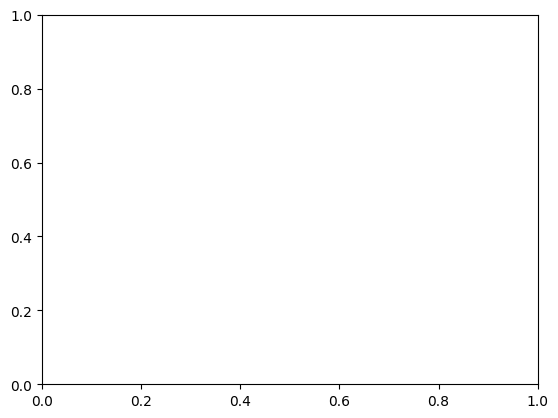

In [4]:

# create a list of end years
end_years = [2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100]

# prepare figure to plot the results
fig, ax = plt.subplots()

# loop over the end years and create a scenario for each
for end_year in end_years:
    scenario_params = {"end_year": end_year,
                       "income_goal": 20000,
                       "carbon_budget": 1100,
                       "gdp_assumption": "constant_ratio",
                       "pop_growth_assumption": "semi_log_model",
                       "tech_evolution_assumption": "plausible"
                }

    scenario_1 = Scenario(scenario_params)
    scenario_1.compute_country_scenario_params()
    scenario_1.run()

    plotting_1 = Plots(scenario_1)
    
    # plot the results
    plotting_1.plot_global_emissions(ax=ax,
                                    color=colors[end_years.index(end_year)],
                                    label="end year: " + str(end_year))

# Collect all legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Find unique labels and their handles, maintaining original order (to keep colors consistent)
unique_labels_handles = dict()
for label, handle in zip(labels, handles):
    if label not in unique_labels_handles:
        unique_labels_handles[label] = handle

# Prepare lists for sorted labels and their corresponding handles
sorted_labels = []
sorted_handles = []

# Add the "Linear Carbon Budget Pathway" first if it exists
if "Linear Carbon Budget Pathway" in unique_labels_handles:
    sorted_labels.append("Linear Carbon Budget Pathway")
    sorted_handles.append(unique_labels_handles["Linear Carbon Budget Pathway"])

# Process and sort end year labels in ascending order
end_years_labels = [(label, handle) for label, handle in unique_labels_handles.items() if label.startswith("end year")]
# Sort based on the integer value extracted from the label
end_years_labels.sort(key=lambda x: int(x[0].split(": ")[1]))

# Append sorted end year labels and their handles
sorted_labels += [label for label, _ in end_years_labels]
sorted_handles += [handle for _, handle in end_years_labels]

# Create the legend with the sorted handles and labels, positioned outside the plot
ax.legend(sorted_handles, sorted_labels, frameon=False, loc='upper left', bbox_to_anchor=(1, 1))

# Adjust subplot parameters to make room for the legend outside the plot
plt.subplots_adjust(right=0.8)

# Adjust subplot parameters to make room for the legend outside the plot
plt.subplots_adjust(right=0.8)
ax.set_ylim(0, 10*1e10)
# show the figure
plt.show()

